# 25th april notebook

In [39]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm

In [40]:
data = pd.read_csv("data/train.csv")
data = data.values

In [41]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
labels = data[:, 0]
data = data[:, 1:]

In [43]:
data = data / 255.

In [44]:
data = torch.tensor(data).float()
labels = torch.tensor(labels).long()

In [45]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                                                                   test_size=0.1)

In [46]:
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

## Creating Deep learning model

In [61]:
def createModel():
    
    class model(nn.Module):
        def __init__(self):
            super().__init__()
            self.input = nn.Linear(784, 64)
            self.hidden_1 = nn.Linear(64, 32)
            self.hidden_2 = nn.Linear(32, 32)
            self.output = nn.Linear(32, 10)
        
        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.hidden_1(x))
            x = F.relu(self.hidden_2(x))
            return self.output(x)
    
    net = model()
    Loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
    return net, Loss, optimizer

In [62]:
def compute_acc(yh, y):
    true = (torch.argmax(yh, axis=1) == y).float()
    return 100 * torch.mean(true)

In [63]:
def train_model(epochs=10):
    model, Loss, optimizer = createModel()
    losses = []
    train_acc = []
    test_acc = []
    
    for i in range(epochs):
        batch_acc = []
        batch_loss = []
        for x, y in train_loader:
            yh = model(x)
            loss = Loss(yh, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Computing
            batch_loss.append(loss.item())
            batch_acc.append(compute_acc(yh, y))
        train_acc.append(np.mean(batch_acc))
        losses.append(np.mean(batch_loss))
        # Computing test acc
        x, y = next(iter(test_loader))
        with torch.no_grad():
            yh = model(x)
        test_acc.append(compute_acc(yh, y))
        print(f"Train: {train_acc[-1]}, test: {test_acc[-1]}")
    return train_acc, test_acc, losses, model

In [64]:
train_acc, test_acc, losses, model = train_model()

Train: 78.73888397216797, test: 93.9047622680664
Train: 94.30567169189453, test: 95.02381134033203
Train: 95.97269439697266, test: 96.19047546386719
Train: 96.68448638916016, test: 96.33332824707031
Train: 97.38833618164062, test: 96.47618865966797
Train: 97.7111587524414, test: 96.76190948486328
Train: 98.09748077392578, test: 96.97618865966797
Train: 98.396484375, test: 97.04762268066406
Train: 98.5129165649414, test: 97.28571319580078
Train: 98.68225860595703, test: 96.9047622680664


## Visualizing the results

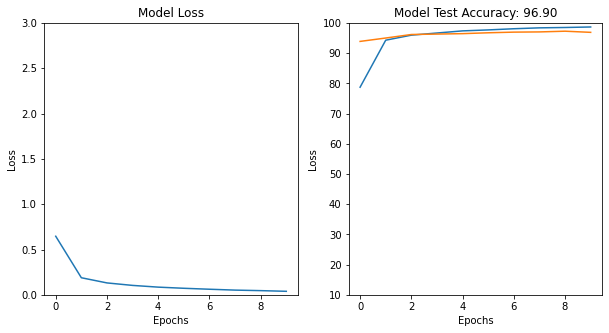

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(losses)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_ylim([0, 3])
ax[0].set_title("Model Loss")

ax[1].plot(train_acc, label="Train")
ax[1].plot(test_acc, label="Test")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_ylim([10, 100])
ax[1].set_title(f"Model Test Accuracy: {test_acc[-1]:.2f}")
plt.plot();

## Performance Measure

In [76]:
yh = model(train_loader.dataset.tensors[0])
train_preds = torch.argmax(yh, axis=1)

yh = model(test_loader.dataset.tensors[0])
test_preds = torch.argmax(yh, axis=1)

In [77]:
test_preds

tensor([6, 2, 0,  ..., 0, 7, 3])

In [82]:
print(skm.precision_score(train_loader.dataset.tensors[1],
                   train_preds,
                   average=None))
print(skm.precision_score(train_loader.dataset.tensors[1],
                   train_preds,
                   average="weighted"))
print(skm.precision_score(train_loader.dataset.tensors[1],
                   train_preds,
                   average="macro"))

[0.99576047 0.99502959 0.99413646 0.9834226  0.9980315  0.99530241
 0.99701897 0.99546257 0.98791209 0.96433187]
0.9906471422549996
0.9906408505530111


In [86]:
train_me = [0, 0, 0, 0]
test_me = [0, 0, 0, 0]

train_me[0] = skm.accuracy_score(train_loader.dataset.tensors[1],
                   train_preds)
train_me[1] = skm.precision_score(train_loader.dataset.tensors[1],
                   train_preds,
                   average="weighted")
train_me[2] = skm.recall_score(train_loader.dataset.tensors[1],
                   train_preds,
                   average="weighted")
train_me[3] = skm.f1_score(train_loader.dataset.tensors[1],
                   train_preds,
                   average="weighted")

test_me[0] = skm.accuracy_score(test_loader.dataset.tensors[1],
                   test_preds)
test_me[1] = skm.precision_score(test_loader.dataset.tensors[1],
                   test_preds,
                   average="weighted")
test_me[2] = skm.recall_score(test_loader.dataset.tensors[1],
                   test_preds,
                   average="weighted")
test_me[3] = skm.f1_score(test_loader.dataset.tensors[1],
                   test_preds,
                   average="weighted")

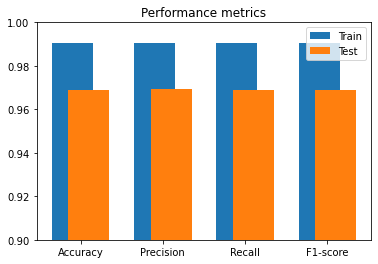

In [87]:
plt.bar(np.arange(4)-.1, train_me, .5)
plt.bar(np.arange(4)+.1, test_me, .5)
plt.xticks([0, 1, 2, 3], ["Accuracy", "Precision", "Recall", "F1-score"])
plt.ylim([.9, 1])
plt.legend(["Train", "Test"])
plt.title("Performance metrics")
plt.show()